### 1. Imports

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
NUM_ROWS = 50
NUM_EPOCHS = 10_000
NUM_OVERSAMPLING = 3_000

### 2. Load data

In [4]:
df = pd.read_excel(
    '../../../data/tlp/Identia_UNED_TLP.xlsx'
)

In [5]:
df.head()

,etiq-id,etiq-diagMMSE,etiq-diagExpTLPtext,etiq-diagExpTLPcode,etiq-diagExpTLP,etiq-diagExpTLPtext_R2,etiq-diagExpTLPcode_R2,etiq-diagExpTLP_R2,demo-genero,demo-fechaEvaluacion,demo-fechaNacimiento,demo-rangoEdad,demo-edad,clin-reservaCognitiva_total,clin-reservaCognitiva_idiomas,clin-reservaCognitiva_ocupacion,clin-reservaCognitiva_escolaridad,clin-reservaCognitiva_escolaridadPadres,clin-reservaCognitiva_cursos,clin-reservaCognitiva_formacionMusical,clin-reservaCognitiva_actividadLectora,clin-reservaCognitiva_juegos,clin-ansiedad,clin-depresion,clin-cardiopatiaIsquemica,clin-diabetes,clin-Hipercolesterolemia,clin-Hipertension,clin-enfermedadesAltTiroides,clin-enfermedadesRenal,clin-enfermedadesHepatica,clin-enfermedadesAntecedentesCardiacos,clin-tratCronico,clin-tratPsicologico,clin-tratPsiquiatrico,clin-familiaresAlzheimer,clin-familiaresOtraDemencia,clin-alcohol,clin-fumador,clin-numCigarros,clin-añosSinFumar,clin-tipoAlcohol,clin-entornoUrbano,clin-Covid_vacunado,clin-Covid_numDosis,clin-Covid_pasadoCovid,clin-Covid_numVecesCovid,clin-Covid_sintomaDifRespirar,clin-Covid_sintomaDolMuscular,clin-Covid_sintomaEscalofrios,clin-Covid_sintomaDolGarganta,clin-Covid_sintomaFiebre,clin-Covid_sintomaDolCabeza,clin-Covid_sintomaDiarrea,clin-Covid_sintomaSarpullido,clin-Covid_sintomaPerOlfato,clin-Covid_sintomaPerGusto,clin-Covid_sintomaCansancio,clin-Covid_sentimientoAislado,clin-nivelSociabilidad,clin-nivelActFisica,clin-frecUsoOrdenador,clin-frecUsoMovil,clin-frecUsoTele,clin-frecUsoEmail,clin-frecUsoRSociales,clin-frecOlvidos,clin-consumoAlcohol_UBEsemanal,clin-añosSinFumar_Tipos_y_Rangos,clin-tipoFumador,ques-QuejasMemo-Total-PD,ques-NavEspacial-All-PD,ques-NavEspacial-resultadosWFQ_NO-PD,ques-NavEspacial-resultadosWFQ_SA-PD,ques-NavEspacial-resultadosWFQ_DE-PD,ques-Sus-totalPar-PD,ques-Sus-totalImpar-PD,ques-Sus-total-PD,ques-MMSE-Total-PD,ques-MMSE-concentracion-PD,ques-MMSE-fijacion-PD,ques-MMSE-lenguaje-PD,ques-MMSE-memoria-PD,ques-MMSE-orientacion-PD,ques-MMSE-escolaridad-PD,eval-TLP-CubCorsi-totalDirectos-PD,eval-TLP-CubCorsi-totalDirectos-PZ,eval-TLP-CubCorsi-totalinversos-PD,eval-TLP-CubCorsi-totalinversos-PZ,eval-TLP-CubCorsi-total-PD,eval-TLP-CubCorsi-total-PZ,eval-TLP-FigRey-tipoCopia-PD,eval-TLP-FigRey-totalCopia-PD,eval-TLP-FigRey-totalCopia-PZ,eval-TLP-FigRey-totalMemoria-PD,eval-TLP-FigRey-totalMemoria-PZ,eval-TLP-FigRey-Duracion-PD,eval-TLP-FigRey-Duracion-PZ,eval-TLP-Stroop-color-PD,eval-TLP-Stroop-color-PDC,eval-TLP-Stroop-color-PZ,eval-TLP-Stroop-palabras-PD,eval-TLP-Stroop-palabras-PDC,eval-TLP-Stroop-palabras-PZ,eval-TLP-Stroop-palabrasColor-PD,eval-TLP-Stroop-palabrasColor-PDC,eval-TLP-Stroop-palabrasColor-PZ,eval-TLP-Stroop-interferencia-PDC,eval-TLP-Stroop-interferencia-PZ,eval-TLP-Tavec-1_RI_A1-PD,eval-TLP-Tavec-1_RI_A1-PZ,eval-TLP-Tavec-2_RI_A5-PD,eval-TLP-Tavec-2_RI_A5-PZ,eval-TLP-Tavec-3_RI_AT-PD,eval-TLP-Tavec-3_RI_AT-PZ,eval-TLP-Tavec-4_RI_B-PD,eval-TLP-Tavec-4_RI_B-PZ,eval-TLP-Tavec-5_Rg_Pr-PD,eval-TLP-Tavec-5_Rg_Pr-PZ,eval-TLP-Tavec-6_Rg_Md-PD,eval-TLP-Tavec-6_Rg_Md-PZ,eval-TLP-Tavec-7_Rg_Rc-PD,eval-TLP-Tavec-7_Rg_Rc-PZ,eval-TLP-Tavec-8_RL_CP-PD,eval-TLP-Tavec-8_RL_CP-PZ,eval-TLP-Tavec-9_RCl_CP-PD,eval-TLP-Tavec-9_RCl_CP-PZ,eval-TLP-Tavec-10_RL_LP-PD,eval-TLP-Tavec-10_RL_LP-PZ,eval-TLP-Tavec-11_RCl_LP-PD,eval-TLP-Tavec-11_RCl_LP-PZ,eval-TLP-Tavec-12_ESem_RI_A-PD,eval-TLP-Tavec-12_ESem_RI_A-PZ,eval-TLP-Tavec-13_ESem_RI_B-PD,eval-TLP-Tavec-13_ESem_RI_B-PZ,eval-TLP-Tavec-14_ESem_RL_CP-PD,eval-TLP-Tavec-14_ESem_RL_CP-PZ,eval-TLP-Tavec-15_ESem_RL_LP-PD,eval-TLP-Tavec-15_ESem_RL_LP-PZ,eval-TLP-Tavec-16_ESer_RI_A-PD,eval-TLP-Tavec-16_ESer_RI_A-PZ,eval-TLP-Tavec-17_ESer_RI_B-PD,eval-TLP-Tavec-17_ESer_RI_B-PZ,eval-TLP-Tavec-18_ESer_RL_CP-PD,eval-TLP-Tavec-18_ESer_RL_CP-PZ,eval-TLP-Tavec-19_ESer_RL_LP-PD,eval-TLP-Tavec-19_ESer_RL_LP-PZ,eval-TLP-Tavec-20_P-PD,eval-TLP-Tavec-20_P-PZ,eval-TLP-Tavec-21_I_RL-PD,eval-TLP-Tavec-21_I_RL-PZ,eval-TLP-Tavec-22_I_RCL-PD,eval-TLP-Tavec-22_I_RCL-PZ,eval-TLP-Tavec-23_Recon

### 3. Preprocesing

In [6]:
def transfor_ed(row):
   if row['etiq-diagExpTLP_R2'] == 'ED1':
      return 'H'
   elif row['etiq-diagExpTLP_R2'] == 'ED2' or row['etiq-diagExpTLP_R2'] == 'ED3':
      return 'D'

In [7]:
df['ED_2Clases'] = df.apply(transfor_ed, axis=1)

In [8]:
drop_columns = [
    'etiq-diagExpTLPcode',
    'etiq-diagExpTLPtext',
    'etiq-diagExpTLPcode_R2',
    'etiq-diagMMSE',
    'etiq-diagExpTLP',
    'etiq-diagExpTLP_R2',
    'etiq-diagExpTLPtext_R2',
    'etiq-id',
    'clin-Covid_numDosis',
    'clin-Covid_numVecesCovid',
    'clin-Covid_pasadoCovid',
    'clin-Covid_sentimientoAislado',
    'clin-Covid_sintomaCansancio',
    'clin-Covid_sintomaDiarrea',
    'clin-Covid_sintomaDifRespirar',
    'clin-Covid_sintomaDolCabeza',
    'clin-Covid_sintomaDolGarganta',
    'clin-Covid_sintomaDolMuscular',
    'clin-Covid_sintomaEscalofrios',
    'clin-Covid_sintomaFiebre',
    'clin-Covid_sintomaPerGusto',
    'clin-Covid_sintomaPerOlfato',
    'clin-Covid_vacunado',
    'clin-añosSinFumar_Tipos_y_Rangos',
    'clin-consumoAlcohol_UBEsemanal',
    'clin-enfermedadesAltTiroides',
    'clin-enfermedadesAntecedentesCardiacos',
    'clin-enfermedadesHepatica',
    'clin-enfermedadesRenal',
    'clin-entornoUrbano',
    'clin-familiaresAlzheimer',
    'clin-familiaresOtraDemencia',
    'clin-tipoFumador',
    'clin-tratCronico',
    'clin-tratPsicologico',
    'clin-tratPsiquiatrico',
    'clin-frecOlvidos',
    'clin-frecUsoEmail',
    'clin-frecUsoMovil',
    'clin-frecUsoOrdenador',
    'clin-frecUsoRSociales',
    'clin-frecUsoTele',
    'clin-nivelActFisica',
    'clin-nivelSociabilidad',
    'clin-reservaCognitiva_actividadLectora',
    'clin-reservaCognitiva_cursos',
    'clin-reservaCognitiva_escolaridadPadres',
    'clin-reservaCognitiva_formacionMusical',
    'clin-reservaCognitiva_juegos',
    'clin-numCigarros',
    'clin-añosSinFumar',
    'clin-tipoAlcohol'
]

In [9]:
pt_columns = [column for column in df.columns if 'PT' in column ]
pz_columns = [column for column in df.columns if 'PZ' in column ]
pdc_columns = [column for column in df.columns if 'PDC' in column]
drop_columns += pt_columns + pz_columns + pdc_columns
df.drop(columns=drop_columns, inplace=True)

In [10]:
df.shape

(314, 77)

In [11]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [12]:
df.columns[df.astype(str).apply(lambda col: col.isin(["inf", "-inf"]).any())]

Index([], dtype='object')

In [13]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=df, table_name='TLP')

In [14]:
categorical_columns = [
    'ED_2Clases'
]
metadata.update_columns(
    column_names=categorical_columns,
    sdtype='categorical',
    table_name='TLP'
)

Auto detected data:



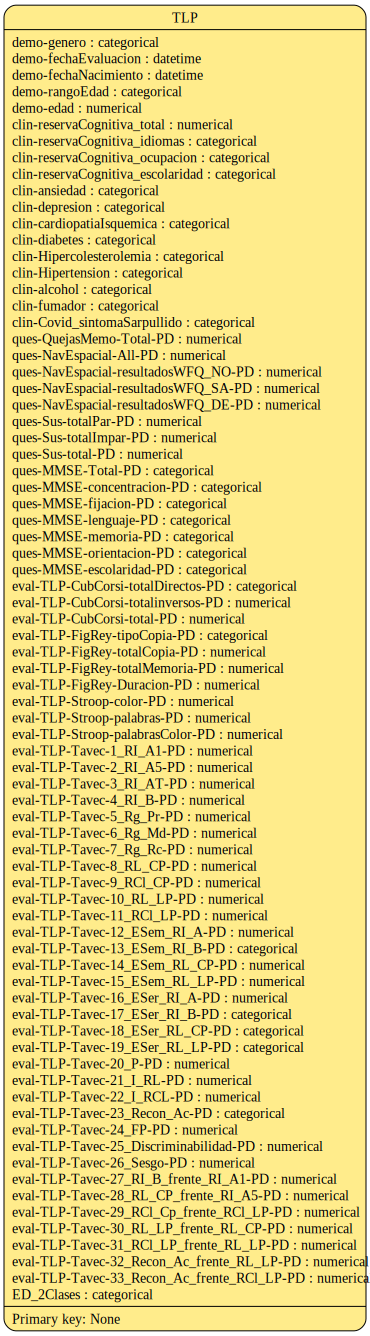

In [15]:
print('Auto detected data:\n')
metadata.visualize()

In [16]:
metadata.validate_table(data=df, table_name='TLP')

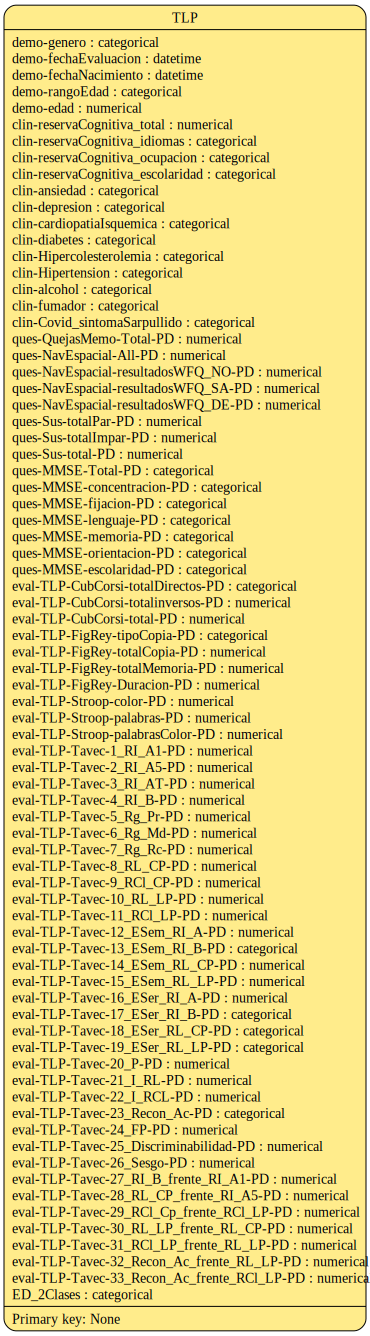

In [17]:
metadata.visualize()

In [18]:
import os
if os.path.exists("metadata.json"):
  os.remove("metadata.json")

metadata.save_to_json('metadata.json')

### 4. Synthesizers

Constrains

In [19]:
num_d, num_h = df['ED_2Clases'].value_counts()
num_synthetic_data = num_d - num_h

In [20]:
df['ED_2Clases'].value_counts()

ED_2Clases
D    248
H     66
Name: count, dtype: int64

In [21]:
from sdv.sampling import Condition

class_d = Condition(
    num_rows=3000,
    column_values={'ED_2Clases': 'D'}
)

class_h = Condition(
    num_rows=3000,
    column_values={'ED_2Clases': 'H'}
)

#### 4.1. GaussianCopulaSynthesizer

In [22]:
from sdv.single_table import GaussianCopulaSynthesizer

gc_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    locales=["es_ES"],
    numerical_distributions={},
    default_distribution='beta'
)

In [23]:
gc_synthesizer.auto_assign_transformers(df)

In [24]:
processed_df = gc_synthesizer.preprocess(df)

In [25]:
gc_synthesizer.fit_processed_data(processed_df)

In [26]:
synthetic_data_list = []

while len(synthetic_data_list) < num_synthetic_data:
    samples = gc_synthesizer.sample(num_rows=NUM_ROWS)
    synthetic_data_list.extend(samples.loc[samples['ED_2Clases'] == 'H'].values.tolist()[:num_synthetic_data - len(synthetic_data_list)])

In [27]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [30]:
gc_synthetic_data_oversampling = gc_synthesizer.sample_from_conditions(
    conditions=[class_d, class_h],
    batch_size = 50,
    max_tries_per_batch = 100
)

Sampling conditions: 100%|██████████| 6000/6000 [00:36<00:00, 162.25it/s]


In [31]:
gc_synthetic_data = pd.concat([df, synthetic_data_df, gc_synthetic_data_oversampling], ignore_index=True)

In [32]:
gc_synthetic_data.shape

(6496, 77)

In [33]:
gc_synthetic_data.to_csv(
    '../../../data/tlp/synthetic-oversampling-gc.csv',
    index=False
)

#### 4.2.CTGANSynthesizer

In [34]:
from sdv.single_table import CTGANSynthesizer

ctgan_synthesizer = CTGANSynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    locales=['es_ES'],
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [35]:
ctgan_synthesizer.auto_assign_transformers(df)

In [36]:
processed_df = ctgan_synthesizer.preprocess(df)

In [37]:
ctgan_synthesizer.fit_processed_data(processed_df)

Gen. (-1.46) | Discrim. (-0.67): 100%|██████████| 10000/10000 [20:29<00:00,  8.13it/s]


In [38]:
synthetic_data_list = []

while len(synthetic_data_list) < num_synthetic_data:
    samples = ctgan_synthesizer.sample(num_rows=NUM_ROWS)
    synthetic_data_list.extend(samples.loc[samples['ED_2Clases'] == 'H'].values.tolist()[:num_synthetic_data - len(synthetic_data_list)])


In [39]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [40]:
ctgan_synthetic_data_oversampling = ctgan_synthesizer.sample_from_conditions(
    conditions=[class_d, class_h],
    batch_size = 50,
    max_tries_per_batch = 100
)

Sampling conditions: 100%|██████████| 6000/6000 [01:47<00:00, 55.96it/s]


In [41]:
ctgan_synthetic_data = pd.concat([df, synthetic_data_df, ctgan_synthetic_data_oversampling], ignore_index=True)

In [42]:
ctgan_synthetic_data.shape

(6496, 77)

In [43]:
ctgan_synthetic_data.to_csv(
    '../../../data/tlp/synthetic-oversampling-ctgan.csv',
    index=False
)

#### 4.3. TVAESynthesizer

In [44]:
from sdv.single_table import TVAESynthesizer

tvaes_synthesizer = TVAESynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    epochs=NUM_EPOCHS,
    verbose=True,
    cuda=True
)

In [45]:
tvaes_synthesizer.auto_assign_transformers(df)

In [46]:
processed_df = tvaes_synthesizer.preprocess(df)

In [47]:
tvaes_synthesizer.fit_processed_data(processed_df)

Loss: -178.370: 100%|██████████| 10000/10000 [07:13<00:00, 23.08it/s]


In [48]:
synthetic_data_list = []

while len(synthetic_data_list) < num_synthetic_data:
    samples = tvaes_synthesizer.sample(num_rows=NUM_ROWS)
    synthetic_data_list.extend(samples.loc[samples['ED_2Clases'] == 'H'].values.tolist()[:num_synthetic_data - len(synthetic_data_list)])

In [49]:
synthetic_data_df = pd.DataFrame(synthetic_data_list, columns=df.columns)

In [50]:
tvaes_synthetic_data_oversampling = tvaes_synthesizer.sample_from_conditions(
    conditions=[class_d, class_h],
    batch_size = 50,
    max_tries_per_batch = 100
)

Sampling conditions: 100%|██████████| 6000/6000 [01:54<00:00, 52.38it/s]


In [51]:
tvaes_synthetic_data = pd.concat([df, synthetic_data_df, tvaes_synthetic_data_oversampling], ignore_index=True)

In [52]:
tvaes_synthetic_data.shape

(6496, 77)

In [53]:
tvaes_synthetic_data.to_csv(
    '../../../data/tlp/synthetic-oversampling-tvaes.csv',
    index=False
)

### 5. Evaluating Real vs. Synthetic Data

In [54]:
from sdv.evaluation.single_table import get_column_plot

plot_columns = list(df.columns)

#### 5.1. GaussianCopulaSynthesizer

In [55]:
from sdv.evaluation.single_table import run_diagnostic

gc_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=gc_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 77/77 [00:00<00:00, 1820.51it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 97.82it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [56]:
from sdv.evaluation.single_table import evaluate_quality

gc_quality_report = evaluate_quality(
    df,
    gc_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 77/77 [00:00<00:00, 256.66it/s]|
Column Shapes Score: 84.45%

(2/2) Evaluating Column Pair Trends: |██████████| 2926/2926 [00:11<00:00, 264.00it/s]|
Column Pair Trends Score: 85.59%

Overall Score (Average): 85.02%



In [57]:
# gc_details = gc_quality_report.get_details('Column Pair Trends')
# gc_details[gc_details['Real Correlation'].notnull()]

In [58]:
#gc_quality_report.get_details('Column Shapes')

In [59]:
# for column in plot_columns:
#     fig = get_column_plot(
#         real_data=df,
#         synthetic_data=gc_synthetic_data,
#         column_name=column,
#         metadata=metadata
#     )
#     fig.show()

#### 5.2. CTGANSynthesizer

In [60]:
ctgan_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=ctgan_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 77/77 [00:00<00:00, 1675.23it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 254.20it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [61]:
ctgan_quality_report = evaluate_quality(
    df,
    ctgan_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 77/77 [00:00<00:00, 232.35it/s]|
Column Shapes Score: 80.39%

(2/2) Evaluating Column Pair Trends: |██████████| 2926/2926 [00:11<00:00, 265.20it/s]|
Column Pair Trends Score: 84.38%

Overall Score (Average): 82.39%



In [62]:
# ctgan_details = ctgan_quality_report.get_details('Column Pair Trends')
# ctgan_details[ctgan_details['Real Correlation'].notnull()]

In [63]:
# ctgan_quality_report.get_details('Column Shapes')

In [64]:
#for column in plot_columns:
#    fig = get_column_plot(
#        real_data=df,
#        synthetic_data=ctgan_synthetic_data,
#        column_name=column,
#        metadata=metadata
#    )
#    fig.show()

#### 5.3. TVAESSynthesizer

In [65]:
tvaes_diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=tvaes_synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 77/77 [00:00<00:00, 1635.96it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 724.78it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [66]:
tvaes_quality_report = evaluate_quality(
    df,
    tvaes_synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 77/77 [00:00<00:00, 386.05it/s]|
Column Shapes Score: 90.61%

(2/2) Evaluating Column Pair Trends: |██████████| 2926/2926 [00:10<00:00, 267.25it/s]|
Column Pair Trends Score: 90.41%

Overall Score (Average): 90.51%



In [67]:
# tvaes_details = tvaes_quality_report.get_details('Column Pair Trends')
# tvaes_details[tvaes_details['Real Correlation'].notnull()]

In [68]:
# tvaes_quality_report.get_details('Column Shapes')

In [69]:
#for column in plot_columns:
#    fig = get_column_plot(
#        real_data=df,
#        synthetic_data=tvaes_synthetic_data,
#        column_name=column,
#        metadata=metadata
#    )
#    fig.show()